In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from wand.image import Image

Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL
Setting text antialias to SUBPIXEL


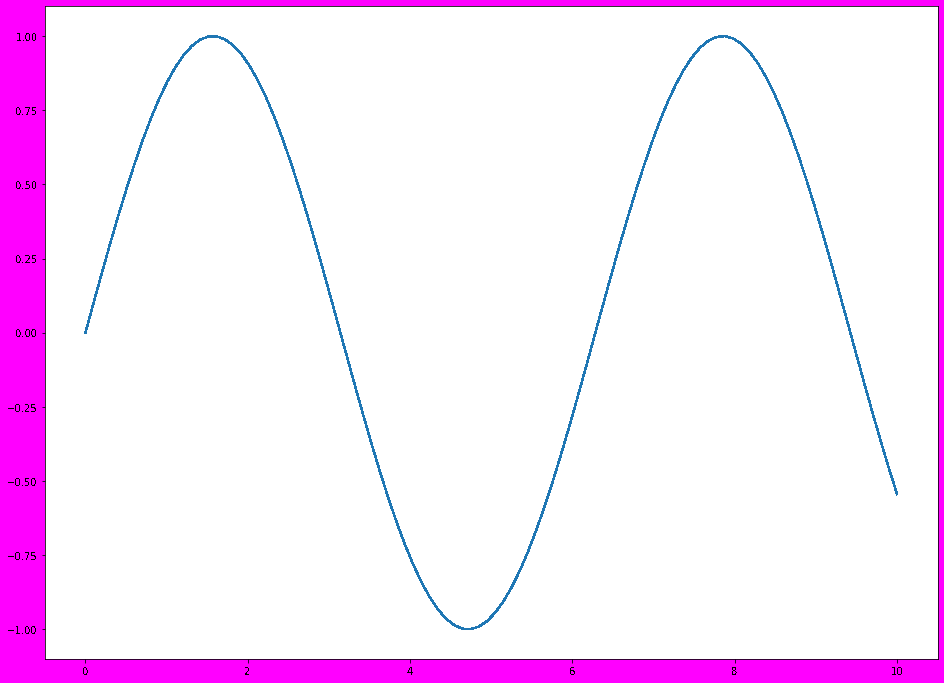

In [13]:
antialiased = False
mpl.rcParams['text.antialiased'] = antialiased

x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,12),facecolor=(1, 0, 1))
ax.plot(x, np.sin(x), antialiased=antialiased)
fig.savefig("test-aliased-agg.png", backend='agg')
fig.savefig("test-aliased-cairo.png", backend='cairo')
# im = Image(filename="test-aliased.pdf")
# im.antialias = False
# im.convert('png')
# im.antialias = False
# im.save(filename='test-aliased.png')

# fig.savefig("test-antialiased-cairo.png", backend='cairo')
# fig.savefig("test-antialiased-agg.png", backend='agg')